In [1]:
# Importing libraries into python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam


In [4]:
# Importing from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.random_projection import GaussianRandomProjection
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [5]:
import statistics
import math

In [6]:
run = pd.read_csv("sgemm_product.csv",index_col=False)
run["runavg (ms)"] = (run["Run1 (ms)"]+run["Run2 (ms)"]+run["Run3 (ms)"]+run["Run4 (ms)"])/4
run["log_run"] = np.where(run['runavg (ms)']>statistics.median(run["runavg (ms)"]), 1.0, 0.0)
run=run.drop(["runavg (ms)", "Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
run


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,0.0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,0.0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,0.0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,0.0


In [7]:
x= run.iloc[:,:14]
y=run.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(169120, 14)
(72480, 14)
(169120,)
(72480,)


In [9]:
# Creating a copy of the train and the test variables to perform scaling
scal_x_train = x_train.copy(deep=True)
scal_x_test = x_test.copy(deep=True)

In [10]:
scaler = preprocessing.StandardScaler()

In [11]:
# Scaling x_train with x_train parameters
scaler.fit_transform(scal_x_train)

array([[-0.38917966, -0.3866653 ,  0.82420294, ..., -1.00057964,
        -0.9994207 ,  0.999598  ],
       [ 1.11765278,  1.12118517, -1.21329342, ...,  0.9994207 ,
         1.00057964,  0.999598  ],
       [ 1.11765278,  1.12118517, -1.21329342, ...,  0.9994207 ,
        -0.9994207 , -1.00040216],
       ...,
       [ 1.11765278,  1.12118517, -1.21329342, ...,  0.9994207 ,
        -0.9994207 , -1.00040216],
       [ 1.11765278,  1.12118517,  0.82420294, ..., -1.00057964,
         1.00057964,  0.999598  ],
       [-0.38917966,  1.12118517,  0.82420294, ...,  0.9994207 ,
        -0.9994207 ,  0.999598  ]])

In [12]:
# Scaling x_test with x_test parameters
scaler.fit_transform(scal_x_test)

array([[-0.3803382 , -0.38619742,  0.82941947, ..., -0.99864882,
        -1.00135301, -0.99906225],
       [-0.3803382 ,  1.11874696,  0.82941947, ..., -0.99864882,
        -1.00135301,  1.00093863],
       [-0.3803382 ,  1.11874696,  0.82941947, ..., -0.99864882,
        -1.00135301,  1.00093863],
       ...,
       [ 1.12701832, -0.38619742,  0.82941947, ..., -0.99864882,
        -1.00135301,  1.00093863],
       [-1.13401646,  1.11874696,  0.82941947, ..., -0.99864882,
         0.99864882,  1.00093863],
       [ 1.12701832, -0.38619742,  0.82941947, ..., -0.99864882,
        -1.00135301, -0.99906225]])

In [13]:
#Kmeans
model_kmeans = KMeans(n_clusters = 2, random_state = 50)
model_kmeans.fit(scal_x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [14]:
predictions = model_kmeans.predict(scal_x_train)
print(accuracy_score(y_train, predictions)*100)
print(confusion_matrix(y_train,predictions))

30.164971617786186
[[18251 66266]
 [51839 32764]]


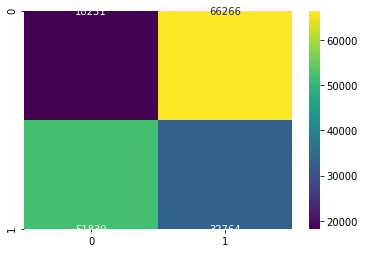

In [15]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,predictions)),annot=True,fmt="g", cmap='viridis')

In [16]:
predictions_test = model_kmeans.predict(scal_x_test)
print(accuracy_score(y_test, predictions_test)*100)
print(confusion_matrix(y_test,predictions_test))

30.137969094922738
[[ 7683 28601]
 [22035 14161]]


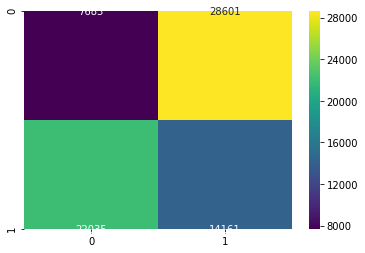

In [17]:
#Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions_test)),annot=True,fmt="g", cmap='viridis')

In [18]:
#Running Iterations for different values of K ##
sum_square_distance = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(scal_x_train)
    sum_square_distance.append(kmeans.inertia_)

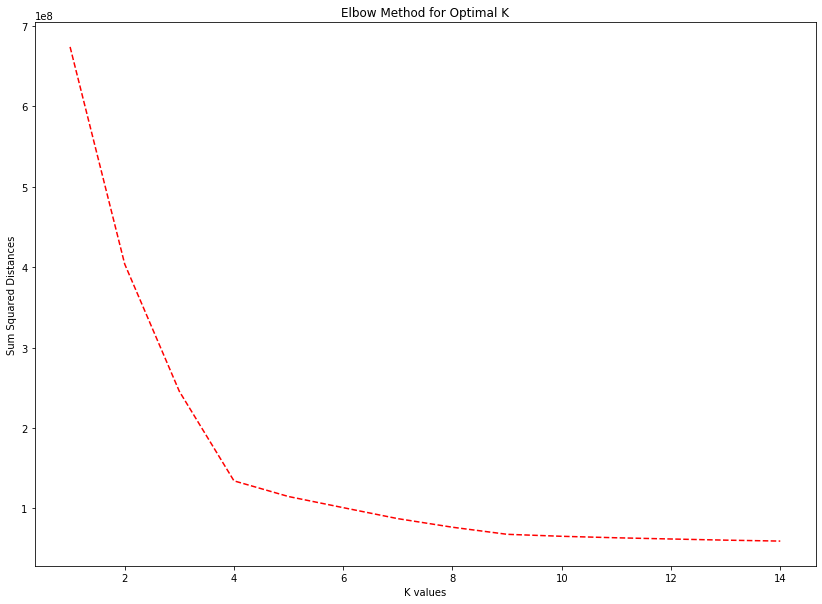

In [19]:
plt.figure(figsize=(14,10))
plt.title("Elbow Method for Optimal K")
plt.xlabel("K values")
plt.ylabel("Sum Squared Distances")
plt.plot(K, sum_square_distance, color = 'red', linestyle = 'dashed')


In [20]:
#Gaussian 
Gauss = GaussianMixture(n_components=2,random_state=2)
Gauss.fit(scal_x_train)

# Prediction using the train parameters
prediction_gmm = Gauss.predict(scal_x_train)
probability = Gauss.predict_proba(scal_x_train)
acc_gmm= round(100*accuracy_score(y_train,prediction_gmm),2)
print(acc_gmm)
print(confusion_matrix(y_train,prediction_gmm))

37.38
[[24216 60301]
 [45596 39007]]


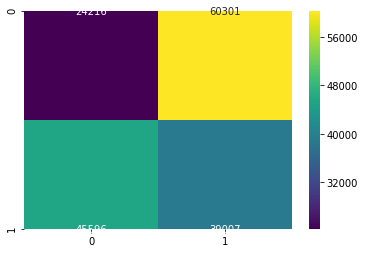

In [21]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_gmm)),annot=True,fmt="g", cmap='viridis')

In [22]:
# Prediction using the test parameters
prediction_gmm_test = Gauss.predict(scal_x_test)
acc_gmm= round(100*accuracy_score(y_test,prediction_gmm_test),2)
print(acc_gmm)
print(confusion_matrix(y_test,prediction_gmm_test))

37.7
[[10564 25720]
 [19432 16764]]


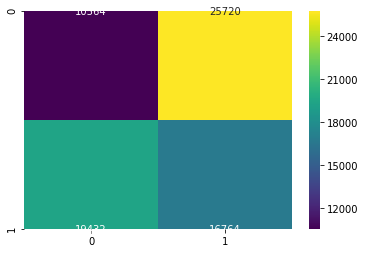

In [23]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,prediction_gmm_test)),annot=True,fmt="g", cmap='viridis')

In [24]:
def GMM_def(X_train, n = 2):
    Gauss1 = GaussianMixture(n_components=n,random_state=2)
    Gauss1.fit(X_train)
    predictions1 = Gauss1.predict(X_train)
    return round(100*accuracy_score(y_train,predictions1),2), predictions1

In [25]:
## Feature Selection using Decision Trees ##
estimator = ExtraTreesClassifier(n_estimators = 10)
featureSelection = SelectFromModel(estimator)
featureSelection.fit(scal_x_train, y_train)
selectedFeatures = featureSelection.transform(scal_x_train)
selectedFeatures

array([[ 64,  64,   8,  16],
       [128, 128,  16,   8],
       [128, 128,  16,   8],
       ...,
       [128, 128,   8,  32],
       [128, 128,  16,   8],
       [ 64, 128,   8,  16]], dtype=int64)

In [26]:
x_train.columns[featureSelection.get_support()]

Index(['MWG', 'NWG', 'MDIMC', 'NDIMC'], dtype='object')

In [27]:
#Building the model using the above given features.
feature_selected_x_train = scal_x_train.loc[:,['MWG', 'NWG', 'MDIMC', 'NDIMC']]

In [28]:
feature_selected_x_train.head()

,MWG,NWG,MDIMC,NDIMC
99545,64,64,8,16
212039,128,128,16,8
210460,128,128,16,8
223572,128,128,8,16
100607,64,64,8,16


In [29]:
feature_selected_x_test = x_test.loc[:,['MWG', 'NWG', 'MDIMC', 'NDIMC']]

In [30]:
model_feature = KMeans(n_clusters=2, random_state=50)
model_feature.fit(feature_selected_x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [31]:
# VALIDATION
prediction_feature_valid = model_feature.predict(feature_selected_x_train)
valid_feature = accuracy_score(y_train, prediction_feature_valid)
print(accuracy_score(y_train, prediction_feature_valid)*100)
# TEST RESULTS
prediction_feature_test = model_feature.predict(feature_selected_x_test)
test_feature = accuracy_score(y_test, prediction_feature_test)
print(accuracy_score(y_test, prediction_feature_test)*100)

69.83502838221382
69.86203090507726


In [32]:
print(confusion_matrix(y_train,prediction_feature_valid))

[[66266 18251]
 [32764 51839]]


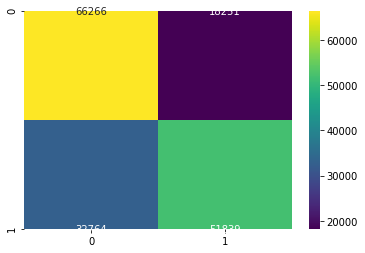

In [33]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_feature_valid)),annot=True,fmt="g", cmap='viridis')

In [34]:
gmm_acc, gmm_prediction = GMM_def(feature_selected_x_train, 2)
print(gmm_acc)
print(confusion_matrix(y_train,gmm_prediction))

37.38
[[24216 60301]
 [45596 39007]]


In [35]:
# PCA 
pca = PCA()
pca_X_train = pca.fit_transform(scal_x_train)
pca_X_test = pca.transform(scal_x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.53637001e-01, 4.52833580e-01, 2.53185989e-02, 2.11695743e-02,
       1.72866630e-02, 1.70991060e-02, 8.63562050e-03, 2.25822555e-03,
       7.55885884e-04, 7.54830655e-04, 6.28805168e-05, 6.27306479e-05,
       6.27289199e-05, 6.25741909e-05])

In [36]:
# Printing the variance in different number of components
for i in range(1,30):
    print('Number of components = ',  i ,'**** Variance covered = ', round(explained_variance[0:i].sum()*100, 2),'%')

Number of components =  1 **** Variance covered =  45.36 %
Number of components =  2 **** Variance covered =  90.65 %
Number of components =  3 **** Variance covered =  93.18 %
Number of components =  4 **** Variance covered =  95.3 %
Number of components =  5 **** Variance covered =  97.02 %
Number of components =  6 **** Variance covered =  98.73 %
Number of components =  7 **** Variance covered =  99.6 %
Number of components =  8 **** Variance covered =  99.82 %
Number of components =  9 **** Variance covered =  99.9 %
Number of components =  10 **** Variance covered =  99.97 %
Number of components =  11 **** Variance covered =  99.98 %
Number of components =  12 **** Variance covered =  99.99 %
Number of components =  13 **** Variance covered =  99.99 %
Number of components =  14 **** Variance covered =  100.0 %
Number of components =  15 **** Variance covered =  100.0 %
Number of components =  16 **** Variance covered =  100.0 %
Number of components =  17 **** Variance covered =  

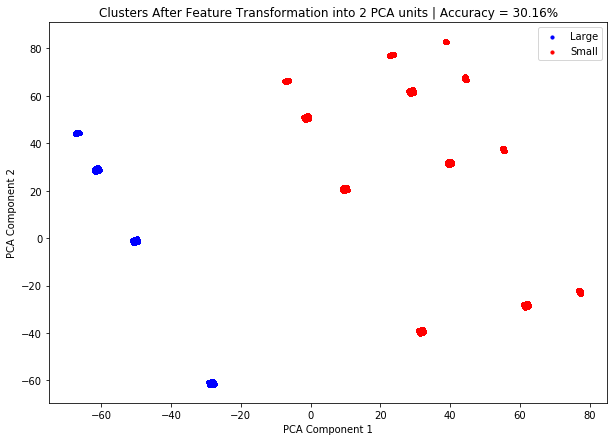

In [37]:
kmeans_plot = KMeans(n_clusters=2,random_state=50)
pca_2 = PCA(n_components=2)
x_ = pca_2.fit_transform(x_train)
kmeans_plot.fit(x_train)
y_kmeans_2 = kmeans_plot.fit_predict(x_train)
acc= round(100*accuracy_score(y_train,y_kmeans_2),2)

# Visualising the clusters
plt.figure(figsize=(10,7))
plt.scatter(x_[y_kmeans_2 == 0, 0], x_[y_kmeans_2 == 0, 1], s = 10, c = 'blue', label = 'Large')
plt.scatter(x_[y_kmeans_2 == 1, 0], x_[y_kmeans_2 == 1, 1], s = 10, c = 'red', label = 'Small')
plt.title("Clusters After Feature Transformation into 2 PCA units | Accuracy = {}%".format(acc))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

In [38]:
pca = PCA(n_components=2)
pca_x_train = pca.fit_transform(scal_x_train)
pca_x_test = pca.transform(scal_x_test)

In [39]:
model_pca = KMeans(n_clusters=2, random_state=50)
model_pca.fit(pca_x_train)

# VALIDATION
prediction_pca_valid = model_pca.predict(pca_x_train)
valid_pca = accuracy_score(y_train, prediction_pca_valid)
print(accuracy_score(y_train, prediction_pca_valid)*100)

# TEST RESULTS
prediction_pca_test = model_pca.predict(pca_x_test)
test_pca = accuracy_score(y_test, prediction_pca_test)
print(accuracy_score(y_test, prediction_pca_test)*100)

69.83502838221382
69.86203090507726


In [40]:
print(confusion_matrix(y_train,prediction_pca_valid))

[[66266 18251]
 [32764 51839]]


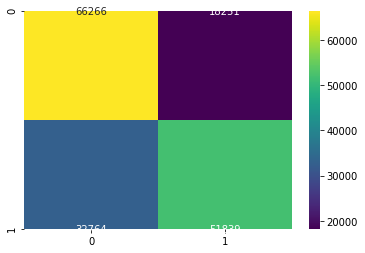

In [41]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_pca_valid)),annot=True,fmt="g", cmap='viridis')

In [42]:
gmm_acc, gmm_prediction = GMM_def(pca_x_train, 2)
print(gmm_acc)

37.38


In [43]:
print(confusion_matrix(y_train,gmm_prediction))

[[24216 60301]
 [45596 39007]]


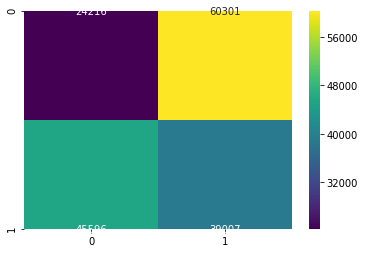

In [44]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,gmm_prediction)),annot=True,fmt="g", cmap='viridis')

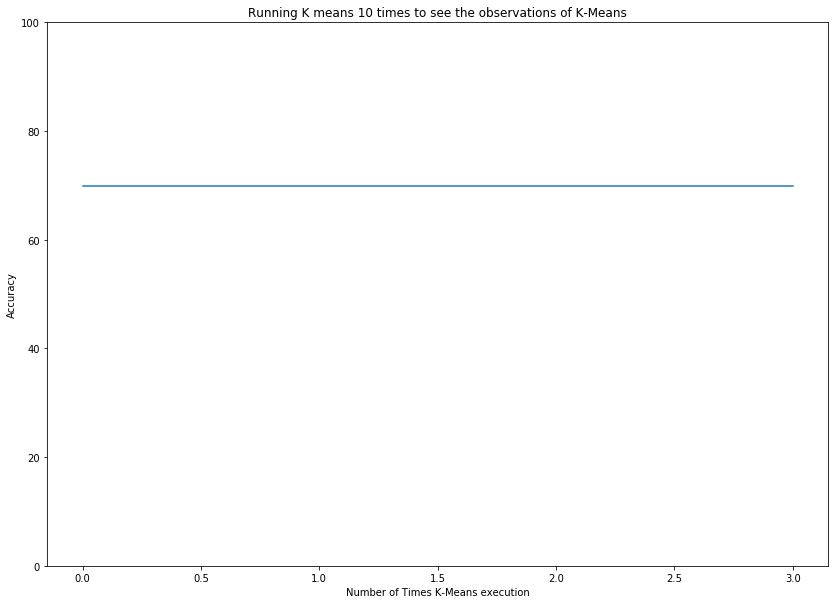

In [45]:
 ## Running K-Means for few times and observing its behaviour ##
acc_k = []
for i in range(1,5):

    kmeans_multi = KMeans(n_clusters=2,random_state=50)
    kmeans_multi.fit(pca_x_train)

    predictions_multi = kmeans_multi.predict(pca_x_train)
    acc1= round(100*accuracy_score(y_train,predictions_multi),2)
    acc_k.append(acc1)
    
plt.figure(figsize=(14,10))
plt.plot(acc_k)
plt.ylabel("Accuracy")
plt.title("Running K means 10 times to see the observations of K-Means")
plt.xlabel("Number of Times K-Means execution")
plt.ylim(0,100)
plt.show()

In [46]:
## ICA ##
acc = []
for i in range(1,50):
    
    ica = FastICA(n_components=i)
    ica_x_train = ica.fit_transform(scal_x_train)
    kmeans_ica = KMeans(n_clusters=2, random_state=50)
    kmeans_ica.fit(ica_x_train)

    predictions_ica = kmeans_ica.predict(ica_x_train)
    acc_ica= round(100*accuracy_score(y_train,predictions_ica),2)
    acc.append(acc_ica)

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:303: UserWarning: n_components is too large: it will be set to 14
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:303: UserWarning: n_components is too large: it will be set to 14
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:303: UserWarning: n_components is too large: it will be set to 14
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:303: UserWarning: n_components is too large: it will be set to 14
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:303: UserWarning: n_components is too large: it will be set to 14
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:303: UserWarning: n_components is too large: it will be set to 14
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:303: UserWarning: n_components is too large: it will be set to 14
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


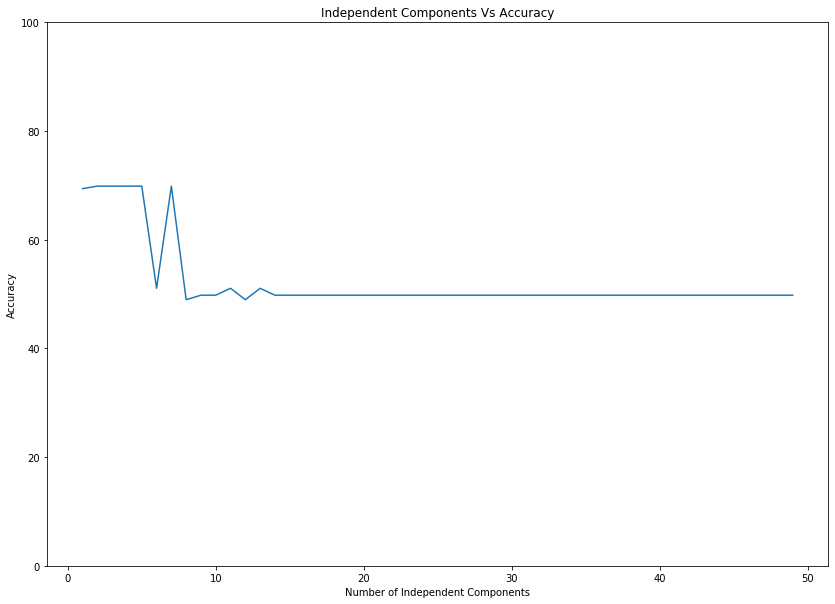

In [47]:
plt.figure(figsize=(14,10))
plt.plot(range(1,50),acc)
plt.ylabel("Accuracy")
plt.ylim(0,100)
plt.xlabel("Number of Independent Components")
plt.title("Independent Components Vs Accuracy")
plt.show()

In [48]:
ica = FastICA(n_components=6)

ica_x_train = pd.DataFrame(ica.fit_transform(scal_x_train))
ica_x_test = pd.DataFrame(ica.transform(scal_x_test))

In [49]:
model_ica = KMeans(n_clusters=2, random_state=50)
model_ica.fit(ica_x_train)

# VALIDATION
prediction_ica_valid = model_ica.predict(ica_x_train)
valid_ica = accuracy_score(y_train, prediction_ica_valid)
print(accuracy_score(y_train, prediction_ica_valid)*100)

# TEST RESULTS
prediction_ica_test = model_ica.predict(ica_x_test)
test_ica = accuracy_score(y_test, prediction_ica_test)
print(accuracy_score(y_test, prediction_ica_test)*100)

51.04836802270577
51.08719646799117


In [50]:
print(confusion_matrix(y_train,prediction_ica_valid))

[[51219 33298]
 [49489 35114]]


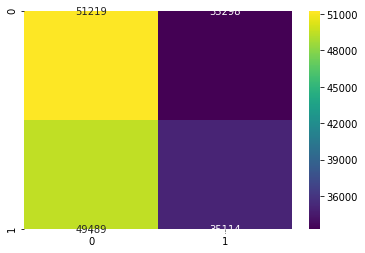

In [51]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_ica_valid)),annot=True,fmt="g", cmap='viridis')

In [52]:
ica_acc, gmm_prediction = GMM_def(ica_x_train,2)
print(ica_acc)

49.77


In [53]:
print(confusion_matrix(y_train,gmm_prediction))

[[62089 22428]
 [62525 22078]]


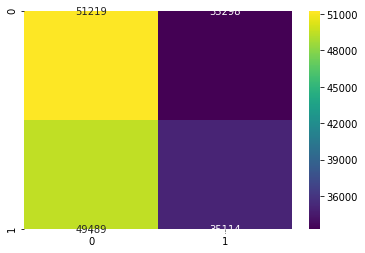

In [54]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_ica_valid)),annot=True,fmt="g", cmap='viridis')

In [55]:
## RANDOMIZED PROJECTIONS ##
acc = []
for i in range(1,50):
    
    rca = GaussianRandomProjection(n_components=i, random_state=50)
    rca_x_train = rca.fit_transform(scal_x_train)
    kmeans_rca = KMeans(n_clusters=2, random_state=50)
    kmeans_rca.fit(rca_x_train)

    predictions_rca = kmeans_rca.predict(rca_x_train) 
    acc_rca= round(100*accuracy_score(y_train,predictions_rca),2)
    acc.append(acc_rca)

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (14 < 15).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (14 < 16).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (14 < 17).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityW

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (14 < 43).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (14 < 44).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (14 < 45).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\random_projection.py:376: DataDimensionalityW

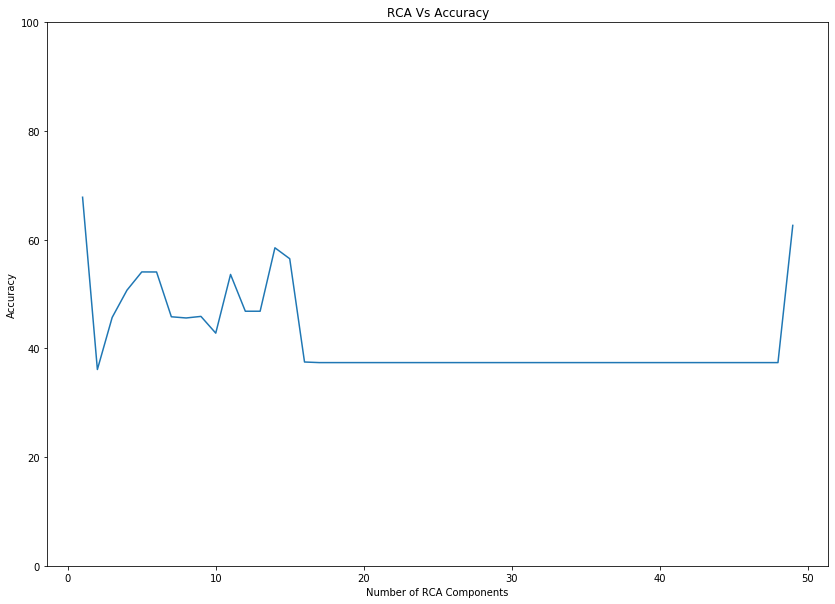

In [56]:
plt.figure(figsize=(14,10))
plt.plot(range(1,50),acc)
plt.ylabel("Accuracy")
plt.ylim(0,100)
plt.xlabel("Number of RCA Components")
plt.title("RCA Vs Accuracy")
plt.show()

In [57]:
rca = GaussianRandomProjection(n_components=5)

rca_x_train = pd.DataFrame(rca.fit_transform(scal_x_train))
rca_x_test = pd.DataFrame(rca.transform(scal_x_test))

In [58]:
model_rca = KMeans(n_clusters=2, random_state=50)
model_rca.fit(rca_x_train)

# VALIDATION
prediction_rca_valid = model_rca.predict(rca_x_train)
valid_rca = accuracy_score(y_train, prediction_rca_valid)
print(accuracy_score(y_train, prediction_rca_valid)*100)

# TEST RESULTS
prediction_rca_test = model_rca.predict(rca_x_test)
test_rca = accuracy_score(y_test, prediction_rca_test)
print(accuracy_score(y_test, prediction_rca_test)*100)

69.83502838221382
69.86203090507726


In [59]:
print(confusion_matrix(y_train,prediction_rca_valid))

[[66266 18251]
 [32764 51839]]


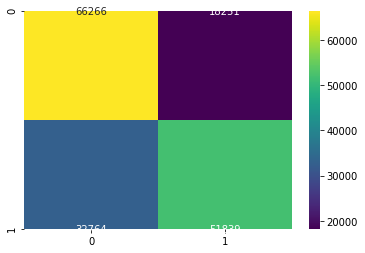

In [60]:
## Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,prediction_rca_valid)),annot=True,fmt="g", cmap='viridis')

In [61]:
rca_acc, rca_prediction = GMM_def(rca_x_train,2)
print(rca_acc)
print(confusion_matrix(y_train,rca_prediction))

69.83
[[66277 18240]
 [32786 51817]]


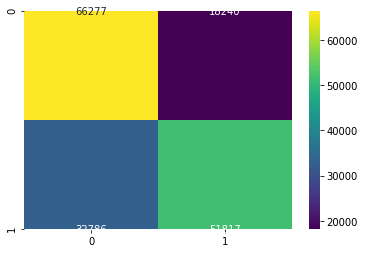

In [62]:
# Heatmap for the above shown confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,rca_prediction)),annot=True,fmt="g", cmap='viridis')

In [73]:
validation_scores_kmeans = [69.83, 69.83, 51.04, 69.83]
validation_scores_gmm = [37.38, 37.38, 49.77, 69.83]

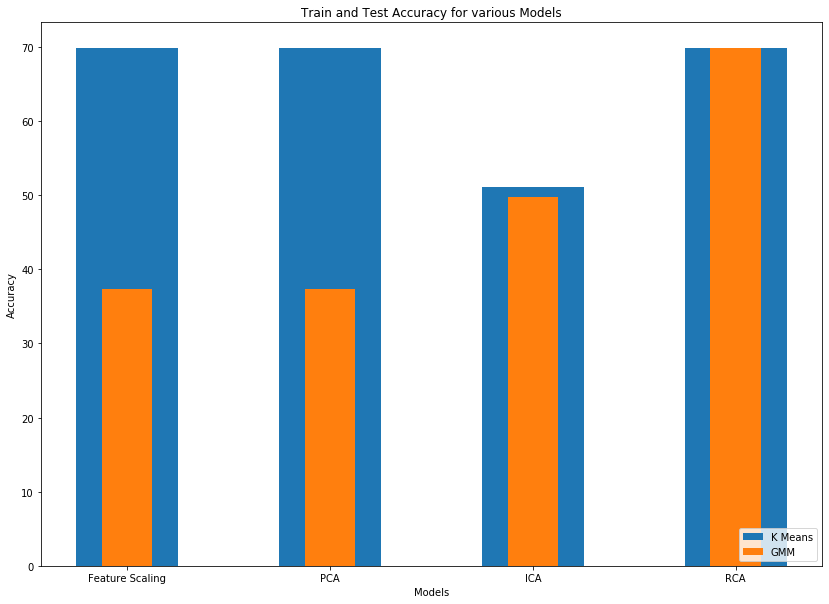

In [74]:
plt.figure(figsize=(14,10))
plt.xlabel("Models")
plt.ylabel("Accuracy")
Models =['Feature Scaling','PCA','ICA','RCA']
plt.bar(Models,validation_scores_kmeans,label='K Means', width = 0.5)
plt.bar(Models,validation_scores_gmm,label='GMM', width = 0.25)
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models")
plt.show()

In [65]:
pca_x_train = np.asarray(pca_x_train)
y_train= np.asarray(y_train)
pca_x_test = np.asarray(pca_x_test)
y_test = np.asarray(y_test)

In [66]:
## Neural Network ##
classifier = Sequential()
classifier.add(Dense(12, activation= 'relu', input_dim =2))
classifier.add(Dense(15, activation= 'relu'))
classifier.add(Dense(1, activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
classfit = classifier.fit(pca_x_train, y_train, batch_size = 10, epochs = 15, validation_data=(pca_x_test,y_test))

Train on 169120 samples, validate on 72480 samples
Epoch 1/15
169120/169120 [==============================] - 54s 316us/sample - loss: 0.5788 - accuracy: 0.7142 - val_loss: 0.5585 - val_accuracy: 0.7194
Epoch 2/15
169120/169120 [==============================] - 54s 320us/sample - loss: 0.5462 - accuracy: 0.7230 - val_loss: 0.5467 - val_accuracy: 0.7249
Epoch 3/15
169120/169120 [==============================] - 55s 323us/sample - loss: 0.5426 - accuracy: 0.7251 - val_loss: 0.5396 - val_accuracy: 0.7252
Epoch 4/15
169120/169120 [==============================] - 49s 289us/sample - loss: 0.5378 - accuracy: 0.7301 - val_loss: 0.5355 - val_accuracy: 0.7364
Epoch 5/15
169120/169120 [==============================] - 51s 304us/sample - loss: 0.5351 - accuracy: 0.7322 - val_loss: 0.5362 - val_accuracy: 0.7333
Epoch 6/15
169120/169120 [==============================] - 49s 287us/sample - loss: 0.5339 - accuracy: 0.7318 - val_loss: 0.5310 - val_accuracy: 0.7326
Epoch 7/15
169120/169120 [=====

In [67]:
y_pred_relu = classifier.predict(pca_x_test)
y_pred_relu = y_pred_relu > 0.5
print(accuracy_score(y_test,y_pred_relu)*100)
confusion_matrix(y_test,y_pred_relu)

73.67135761589404


array([[29172,  7112],
       [11971, 24225]], dtype=int64)

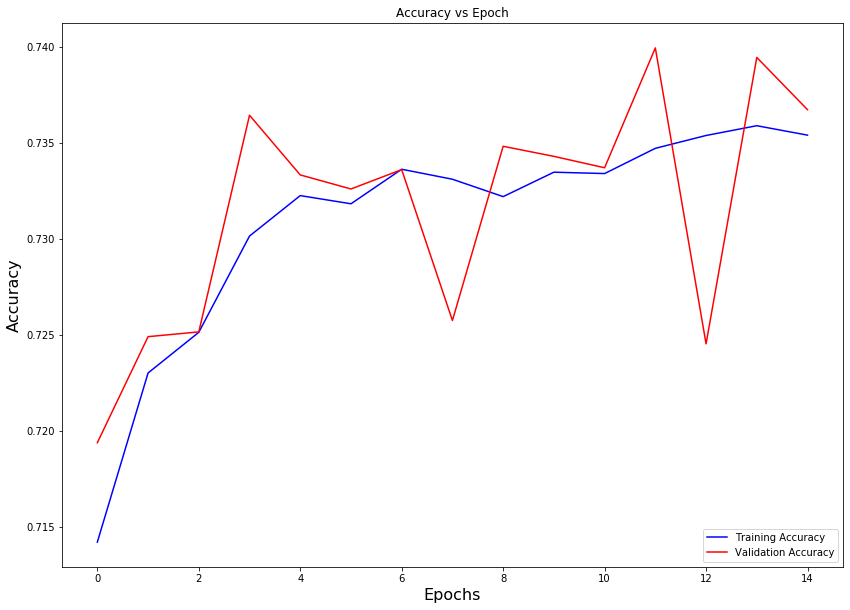

In [68]:
plt.figure(figsize=(14,10))
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.title("Accuracy vs Epoch")
plt.plot(classfit.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(classfit.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [69]:
new_main = pd.DataFrame()
main1 = pd.DataFrame({"KM_Pred": predictions,"EM_Prob": probability[:,1],"ActualOutput": y_train})
new_main = new_main.append(main1)

new_main.head()

,KM_Pred,EM_Prob,ActualOutput
0,1,1.000000e+00,0.0
1,0,5.990654e-09,1.0
2,0,1.573707e-09,1.0
3,0,8.850033e-10,1.0
4,1,1.000000e+00,0.0


In [70]:
x_train_clust = new_main.iloc[:, 0:2]
y_clust = new_main.iloc[:, 2:]

In [71]:
NNclassifier = Sequential()
NNclassifier.add(Dense(12, activation = 'relu', input_dim = 2))
NNclassifier.add(Dense(15,  activation = 'relu'))
NNclassifier.add(Dense(1,  activation = 'sigmoid'))
NNclassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
NNclassifier.fit(x_train_clust, y_clust, batch_size = 10, nb_epoch = 10)

Train on 169120 samples
Epoch 1/10
169120/169120 [==============================] - 34s 201us/sample - loss: 0.5681 - accuracy: 0.6970
Epoch 2/10
169120/169120 [==============================] - 33s 197us/sample - loss: 0.5644 - accuracy: 0.6980
Epoch 3/10
169120/169120 [==============================] - 31s 183us/sample - loss: 0.5644 - accuracy: 0.6981
Epoch 4/10
169120/169120 [==============================] - 36s 210us/sample - loss: 0.5642 - accuracy: 0.6981
Epoch 5/10
169120/169120 [==============================] - 38s 225us/sample - loss: 0.5642 - accuracy: 0.6981
Epoch 6/10
169120/169120 [==============================] - 38s 223us/sample - loss: 0.5641 - accuracy: 0.6980
Epoch 7/10
169120/169120 [==============================] - 38s 225us/sample - loss: 0.5642 - accuracy: 0.6981
Epoch 8/10
169120/169120 [==============================] - 38s 225us/sample - loss: 0.5640 - accuracy: 0.6981
Epoch 9/10
169120/169120 [==============================] - 37s 220us/sample - loss: 0.5

In [72]:
y_pred_clust = NNclassifier.predict(x_train_clust)
y_pred_clust = y_pred_clust > 0.5
print(accuracy_score(y_clust,y_pred_clust)*100)
confusion_matrix(y_clust,y_pred_clust)

69.83502838221382


array([[66266, 18251],
       [32764, 51839]], dtype=int64)